# Getting started with OnionNet

OnionNet is a wrapper around graph-tool, targeted towards large multilayered networks. This tutorial will show you how to get started.

In [1]:
import sys
import os
import pandas as pd

import onionnet
print("onionnet package located at:", onionnet.__file__)
from onionnet import OnionNet
import onionnet.visualisation


import graph_tool.all as gt
from graph_tool.all import graph_draw

onionnet package located at: /Users/agjanyunlu/Documents/Metabolomics/onionnet/onionnet/__init__.py


## Inspecting data

For this example we will use a network from Netzschleuder, which is loadable via graph-tool

In [2]:
g1 = gt.collection.ns["moreno_sociograms/grade_1"]
# pos_sfdp1 = gt.sfdp_layout(g)
g1

<Graph object, directed, with 35 vertices and 67 edges, 2 internal vertex properties, 6 internal graph properties, at 0x173c01ee0>

In [3]:
g2 = gt.collection.ns["moreno_sociograms/grade_2"]
# pos_sfdp2 = gt.sfdp_layout(g)
g2

<Graph object, directed, with 29 vertices and 59 edges, 2 internal vertex properties, 6 internal graph properties, at 0x1067f0cb0>

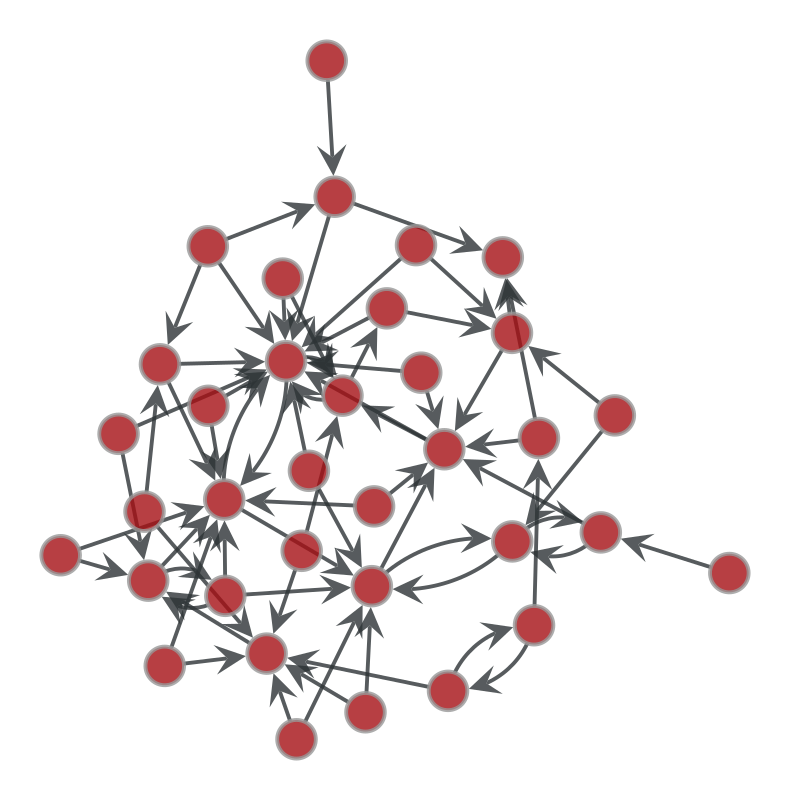

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c01ee0, at 0x173c030b0>

In [4]:
graph_draw(g1, pos=g1.vp['_pos'], output_size=(400, 400))

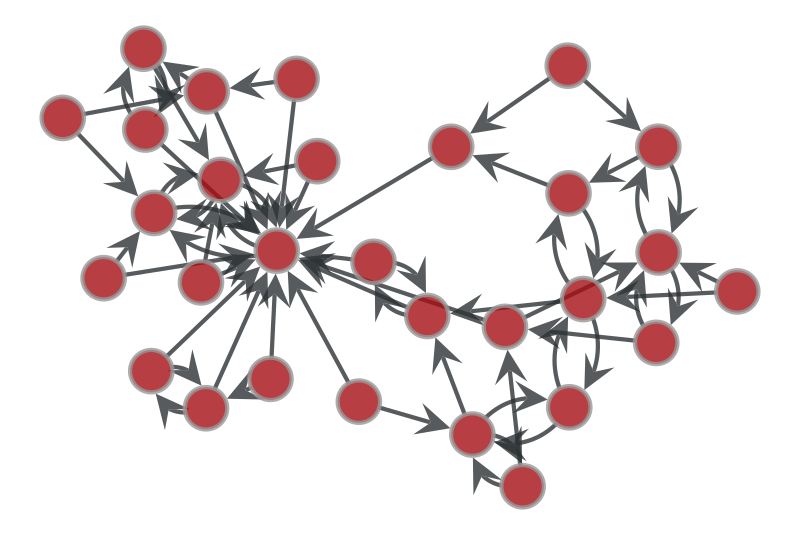

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1067f0cb0, at 0x173c03110>

In [5]:
graph_draw(g2, pos=g2.vp['_pos'], output_size=(400, 400))

In [6]:
list(g1.properties)

[('v', 'name'),
 ('v', '_pos'),
 ('g', 'name'),
 ('g', 'description'),
 ('g', 'citation'),
 ('g', 'url'),
 ('g', 'upstream_license'),
 ('g', 'tags')]

However the basis of OnionNet is to read data in through pandas dataframes. So we do that here now to recreate the above graph. We will also rename the columns while we're at it.

## Creating an OnionNet object using pandas dfs

In [7]:
def get_school_data(edges_or_nodes, grade):
    if edges_or_nodes=='edges':
        df = pd.read_csv(f'../data/moreno_sociograms_grade_{grade}/edges.csv', sep=',', header=0)
        df.columns = ['source_id', 'target_id']
    elif edges_or_nodes=='nodes':
        df = pd.read_csv(f'../data/moreno_sociograms_grade_{grade}/nodes.csv', sep=',', header=0)
        df.columns = ['node_id', 'name', '_pos']
    else:
        raise ValueError("edges_or_nodes must be 'edges' or 'nodes', and a valid grade must be provided")
    return df

In [8]:
get_school_data('nodes', 1)

,node_id,name,_pos
0,0,GO1,"array([-2.98488506, 0.86791962])"
1,1,LP,"array([-2.95675841, 1.34825587])"
2,2,PR,"array([-3.55699067, 3.00557276])"
3,3,WO,"array([-3.34686456, 2.41781597])"
4,4,FA1,"array([-3.19714822, 2.96207321])"
5,5,CA,"array([-3.72010476, 2.18584599])"
6,6,CE,"array([-3.1286156 , 1.92922718])"
7,7,HN1,"array([-3.61538221, 2.70444297])"
8,8,FA2,"array([-2.36291912, 1.56251772])"
9,9,FI,"array([-2.66954048, 1.51927661])"


Now let's say we want to create a multilayered network with the different classes from the school. To do this we will need to concatenate the dataframes.

In [9]:
NUM_GRADES = 2

In [10]:
df_nodes = pd.concat([get_school_data('nodes', i).assign(
    layer=f'grade_{i}') 
    for i in range(1, NUM_GRADES+1)], ignore_index=True)
df_nodes

,node_id,name,_pos,layer
0,0,GO1,"array([-2.98488506, 0.86791962])",grade_1
1,1,LP,"array([-2.95675841, 1.34825587])",grade_1
2,2,PR,"array([-3.55699067, 3.00557276])",grade_1
3,3,WO,"array([-3.34686456, 2.41781597])",grade_1
4,4,FA1,"array([-3.19714822, 2.96207321])",grade_1
...,...,...,...,...
59,24,SH,"array([ 1.60443291, -15.45916702])",grade_2
60,25,HF,"array([ 1.50660581, -15.28444862])",grade_2
61,26,FS,"array([ 1.4128519 , -15.46739683])",grade_2
62,27,AT,"array([ 1.83319756, -15.69773967])",grade_2


In [11]:
df_edges = pd.concat([get_school_data('edges', i).assign(
    source_layer=f'grade_{i}', 
    target_layer=f'grade_{i}',
    interlayer=False)
    for i in range(1, NUM_GRADES+1)], ignore_index=True)
df_edges

,source_id,target_id,source_layer,target_layer,interlayer
0,0,1,grade_1,grade_1,False
1,1,8,grade_1,grade_1,False
2,1,6,grade_1,grade_1,False
3,2,3,grade_1,grade_1,False
4,2,4,grade_1,grade_1,False
...,...,...,...,...,...
121,26,20,grade_2,grade_2,False
122,27,5,grade_2,grade_2,False
123,27,17,grade_2,grade_2,False
124,28,9,grade_2,grade_2,False


From this we can create an OnionNet graph

In [12]:
onion1 = OnionNet()

onion1.grow_onion(df_nodes=df_nodes,
           df_edges=df_edges,
           node_prop_cols=df_nodes.columns.to_list(),
           edge_prop_cols=df_edges.columns.to_list(),
           drop_na=True,
           drop_duplicates=True)

pos_sfdp = gt.sfdp_layout(onion1.core.graph)

In [13]:
print(str(onion1.core.graph))

<Graph object, directed, with 64 vertices and 126 edges, 6 internal vertex properties, 5 internal edge properties, at 0x173c51160>


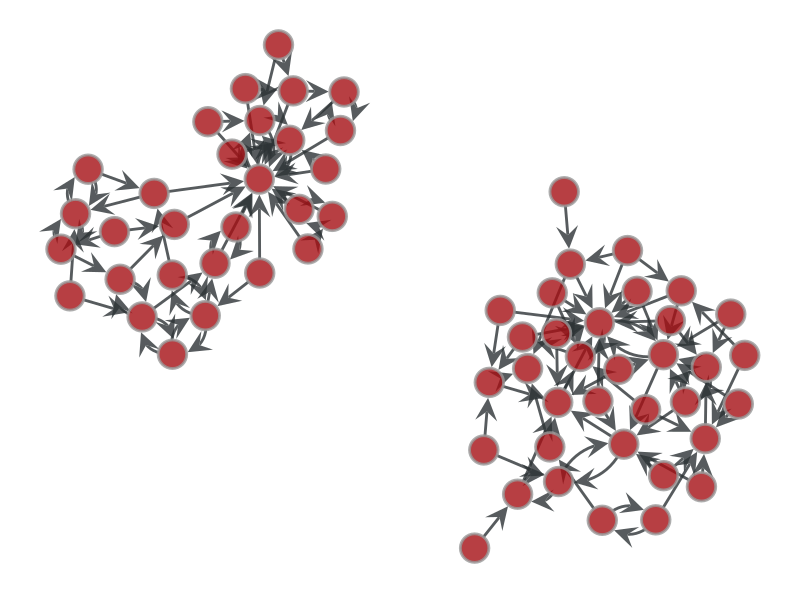

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c51160, at 0x162042ba0>

In [14]:
graph_draw(onion1.core.graph, pos=pos_sfdp, output_size=(400, 400))

This is nice to see we have both our layers (i.e. grades) in the network. But it's also clear to see they're disconnected. Let's simulate a scenario where some students in each grade are friends or siblings with those from other grades.

## Multiple layers with interlayer connections

In [15]:
import numpy as np
import pandas as pd

def add_random_interlayer_edges(df_nodes, df_edges, num_interlayer_edges=10, seed=42):
    """
    Add random interlayer edges to an existing edges DataFrame.
    
    Parameters:
    - df_nodes: DataFrame containing nodes with at least 'id' and 'grade' columns.
    - df_edges: Existing edges DataFrame.
    - num_interlayer_edges: Number of random interlayer edges to create.
    - seed: Random seed for reproducibility.
    
    Returns:
    - Updated df_edges with added interlayer edges.
    """
    np.random.seed(seed)
    
    # Get unique grades from the nodes DataFrame.
    grades = df_nodes['layer'].unique()
    random_edges = []
    
    for _ in range(num_interlayer_edges):
        # Randomly select two different grades.
        source_grade, target_grade = np.random.choice(grades, size=2, replace=False)
        
        # Get nodes corresponding to each grade.
        source_nodes = df_nodes[df_nodes['layer'] == source_grade]
        target_nodes = df_nodes[df_nodes['layer'] == target_grade]
        
        # If one of the grades doesn't have any nodes, skip this iteration.
        if source_nodes.empty or target_nodes.empty:
            continue
        
        # Randomly select one node from each grade (assumes 'id' column exists).
        source_node = source_nodes.sample(n=1).iloc[0]['node_id']
        target_node = target_nodes.sample(n=1).iloc[0]['node_id']
        
        # Append a new interlayer edge.
        random_edges.append({
            'source_id': source_node,
            'target_id': target_node,
            'source_layer': source_grade,
            'target_layer': target_grade,
            'interlayer': True
        })
    
    # Convert the list of random edges into a DataFrame.
    df_random_edges = pd.DataFrame(random_edges)
    
    # Concatenate the random interlayer edges with the existing edges.
    updated_df_edges = pd.concat([df_edges, df_random_edges], ignore_index=True)
    
    return updated_df_edges

# Now add random interlayer edges.
df_edges_with_friends = add_random_interlayer_edges(df_nodes, df_edges, num_interlayer_edges=10, seed=42)
df_edges_with_friends

,source_id,target_id,source_layer,target_layer,interlayer
0,0,1,grade_1,grade_1,False
1,1,8,grade_1,grade_1,False
2,1,6,grade_1,grade_1,False
3,2,3,grade_1,grade_1,False
4,2,4,grade_1,grade_1,False
...,...,...,...,...,...
131,17,17,grade_2,grade_1,True
132,4,15,grade_1,grade_2,True
133,9,10,grade_1,grade_2,True
134,14,26,grade_2,grade_1,True


In [16]:
onion2 = OnionNet()

onion2.grow_onion(df_nodes=df_nodes,
           df_edges=df_edges_with_friends,
           node_prop_cols=df_nodes.columns.to_list(),
           edge_prop_cols=df_edges_with_friends.columns.to_list(),
           drop_na=True,
           drop_duplicates=True)

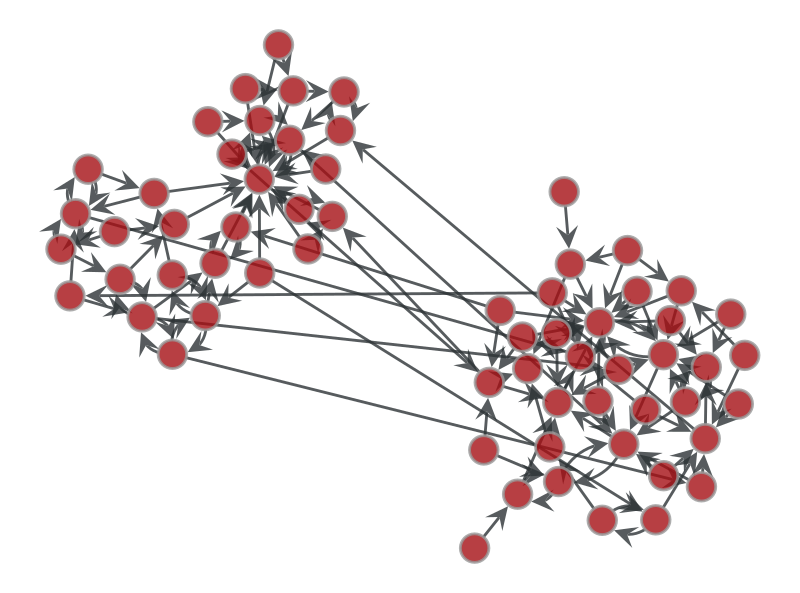

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c51a00, at 0x173c51fa0>

In [17]:
graph_draw(onion2.core.graph, pos=pos_sfdp, output_size=(400, 400))

In [18]:
import onionnet.visualisation

{'v_color': <VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c51a00, at 0x173c2c2c0>, 'legend_node_color': None}
{'e_color': <EdgePropertyMap object with value type 'vector<double>', for Graph 0x173c51a00, at 0x173c52240>, 'legend_edge_color': None}


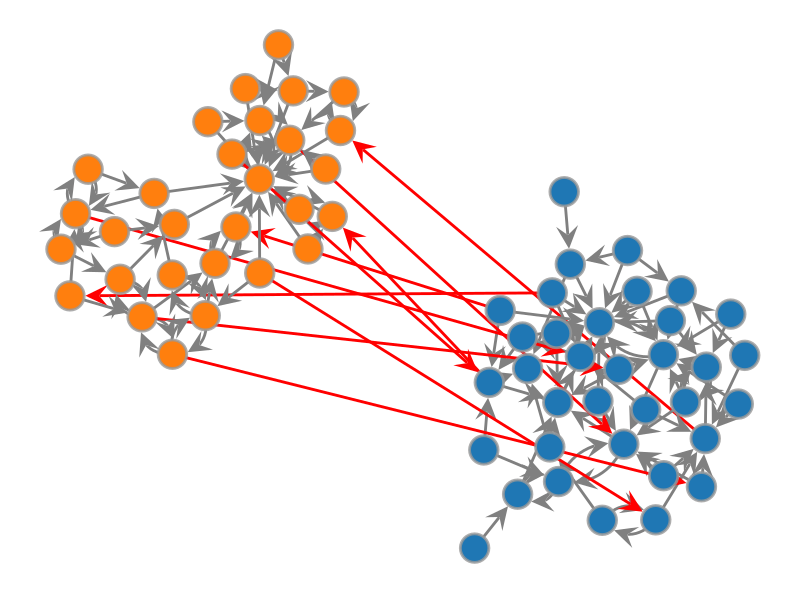

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c51a00, at 0x173c51af0>

In [19]:
v_cols = onionnet.visualisation.color_nodes(g=onion2.core.graph, prop_name='layer')
e_cols = onionnet.visualisation.color_edges(g=onion2.core.graph, prop_name='interlayer', method='boolean')

print(v_cols)
print(e_cols)

graph_draw(onion2.core.graph, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=v_cols['v_color'], 
           edge_color=e_cols['e_color'])

Now it would be good to add labels to this to see the student names. We can do this using `vertex_text`.

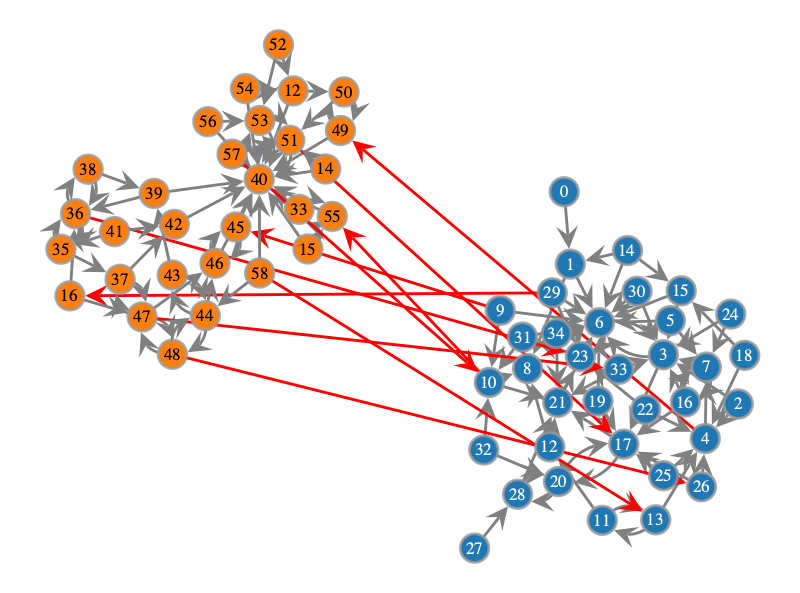

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c51a00, at 0x173c53410>

In [20]:
graph_draw(onion2.core.graph, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=v_cols['v_color'], 
           edge_color=e_cols['e_color'],
           vertex_text=onion2.core.graph.vp['name'])

Oh no! Now all we have is numbers for the students. What has happened here? Let's look at our original nodes_df

In [21]:
df_nodes.groupby(['node_id', 'name']).last().drop(columns='_pos')

layer
node_id name         
0       GO1   grade_1
        ZV    grade_2
1       LP    grade_1
        MK    grade_2
2       LL    grade_2
...               ...
30      KR1   grade_1
31      EL    grade_1
32      SA    grade_1
33      HF    grade_1
34      TA    grade_1

[64 rows x 1 columns]

If we look closely we can also see that these are not the original node_ids in our plot, because in our nodes_id we had some node_ids that were actually the same for student's with different names!

So why did OnionNet treat these differently and what are the labels on the network plot? 

The answer is that behind the scenes OnionNet creates unique nodes based on both the node_id _and_ the layer. Then to improve efficiency, OnionNet encodes these values using the pandas df dtypes by default. So the node numbers we saw before are actually the mappings of these values to a dictionary we have in OnionNet. We can inspect these below.

In [22]:
onion2.core.vertex_categorical_mappings

{'name': {'str_to_int': {'GO1': 0,
   'LP': 1,
   'PR': 2,
   'WO': 3,
   'FA1': 4,
   'CA': 5,
   'CE': 6,
   'HN1': 7,
   'FA2': 8,
   'FI': 9,
   'BO': 10,
   'GO2': 11,
   'SR': 12,
   'SI': 13,
   'SH': 14,
   'MR': 15,
   'WI': 16,
   'HC': 17,
   'RS': 18,
   'DC': 19,
   'KR2': 20,
   'MB': 21,
   'GA': 22,
   'HN2': 23,
   'SM': 24,
   'BB': 25,
   'TS': 26,
   'CH': 27,
   'CN': 28,
   'KI': 29,
   'KR1': 30,
   'EL': 31,
   'SA': 32,
   'HF': 33,
   'TA': 34,
   'ZV': 35,
   'MK': 36,
   'LL': 37,
   'LN': 38,
   'CR1': 39,
   'SL': 40,
   'KP': 41,
   'FE': 42,
   'JM': 43,
   'ZI': 44,
   'GU': 45,
   'GL': 46,
   'GR': 47,
   'OW': 48,
   'HN': 49,
   'CM': 50,
   'PO': 51,
   'CR2': 52,
   'JN': 53,
   'CO': 54,
   'BE': 55,
   'FS': 56,
   'AT': 57,
   'MG': 58},
  'int_to_str': {0: 'GO1',
   1: 'LP',
   2: 'PR',
   3: 'WO',
   4: 'FA1',
   5: 'CA',
   6: 'CE',
   7: 'HN1',
   8: 'FA2',
   9: 'FI',
   10: 'BO',
   11: 'GO2',
   12: 'SR',
   13: 'SI',
   14: 'SH',
   15:

In [23]:
print(onion2.core.vertex_categorical_mappings.keys())
print(onion2.core.edge_categorical_mappings.keys())

dict_keys(['name', '_pos', 'layer'])
dict_keys(['source_layer', 'target_layer', 'interlayer'])


To convert these integers back into their real values we have to decode them using the `decode_property_labels` function.

In [24]:
extra_vars = ['layer', 'name']
for var in extra_vars:
    onion2.prop_manager.decode_property_labels(
        encoded_prop_type='v', 
        encoded_prop_name=var
    )

V property 'layer_decoded' created successfully.
V property 'name_decoded' created successfully.


Note that these properties will be added to the vertex or edge properties of the graph directly

In [25]:
print(list(list(onion2.core.graph.vp)))
print(list(list(onion2.core.graph.ep)))

['layer_hash', 'node_id_hash', 'node_id', 'name', '_pos', 'layer', 'layer_decoded', 'name_decoded']
['source_id', 'target_id', 'source_layer', 'target_layer', 'interlayer']


You won't see them and they won't be added to the vertex or edge categorical mappings (because the categorical mappings are just mappings between the encoded values, not the values of the nodes or edge properties directly)

In [26]:
print(onion2.core.vertex_categorical_mappings.keys())
print(onion2.core.edge_categorical_mappings.keys())

dict_keys(['name', '_pos', 'layer'])
dict_keys(['source_layer', 'target_layer', 'interlayer'])


Now that we have the decoded properties in our vertex properties of the graph, we can try drawing the graph again, this time using the `name_decoded` vertex property

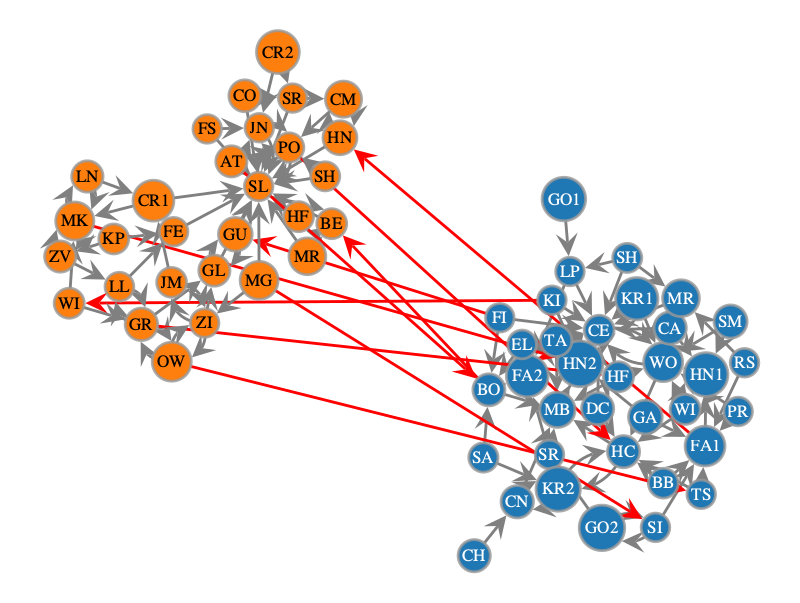

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c51a00, at 0x173c039e0>

In [27]:
graph_draw(onion2.core.graph, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=v_cols['v_color'], 
           edge_color=e_cols['e_color'],
           vertex_text=onion2.core.graph.vp['name_decoded'])

## Filtering the multi-layer network by layers

Now what if we want to filter the network in some ways, for example get a single layer, or multiple layers?

To filter and view certain layers of the network we can use the OnionNet `searcher.view_layers` function.

In [28]:
filtered_layers_gv = onion2.searcher.view_layers(layer_names=['grade_1'])
filtered_layers_gv

<GraphView object, directed, with 35 vertices and 67 edges, 8 internal vertex properties, 5 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x173c53aa0, at 0x173c984d0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x173c53aa0, at 0x173c98440>, False), at 0x173c53aa0>

This returns a GraphView object.

We could also just create a vertex property map (but for now we will not use it)

In [29]:
filtered_layers_vpm = onion2.searcher.view_layers(layer_names=['grade_1'], return_filter=True)
filtered_layers_vpm

<VertexPropertyMap object with value type 'bool', for Graph 0x173c51a00, at 0x173c539b0>

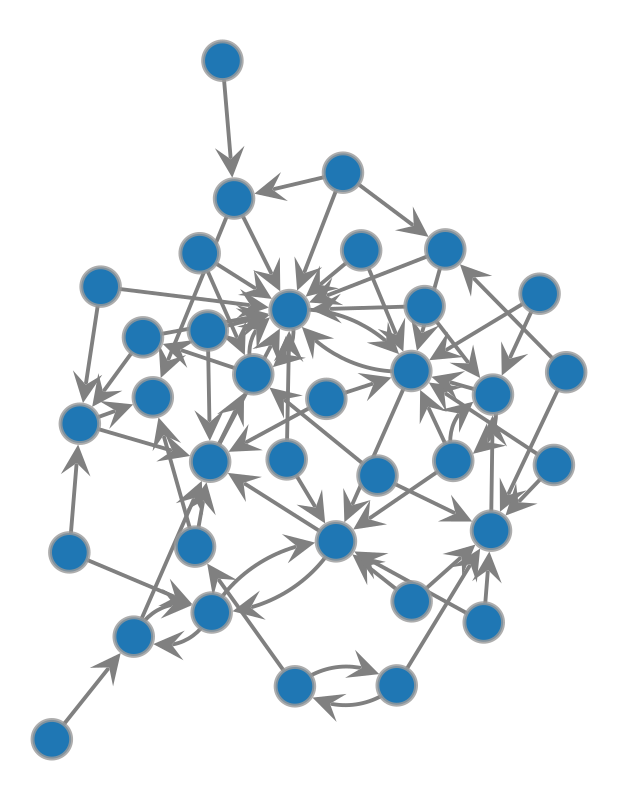

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c53aa0, at 0x173c53800>

In [30]:
graph_draw(filtered_layers_gv, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=v_cols['v_color'], 
           edge_color=e_cols['e_color']) #,
           #vertex_text=filtered_layers.core.graph.vp['name_decoded'])

The graph view has all the same properties as before

In [31]:
list(filtered_layers_gv.vertex_properties)

['layer_hash',
 'node_id_hash',
 'node_id',
 'name',
 '_pos',
 'layer',
 'layer_decoded',
 'name_decoded']

But if you try running the function below you will get an error:

`ValueError: could not broadcast input array from shape (64,) into shape (35,)`

In [32]:
# graph_draw(filtered_layers_gv, 
#            pos=pos_sfdp, 
#            output_size=(400, 400),
#            vertex_fill_color=v_cols['v_color'], 
#            edge_color=e_cols['e_color'],
#            vertex_text=filtered_layers_gv.vp['name_decoded'])

This is because the property maps that we had before for colour of the edges and nodes were for the full graph. Since these were not attached as a vertex or edge property to the graph, the filtered graph layer operation that we did has resulted in the filter being different in shape to the colour property maps.

To overcome this, we have two options:
1. recompute the vertex or edge properties using the filtered graph
2. assign the color property maps to the original graph before filtering

Your choice of these depends on whether you think you will be using the property for long or just want it on the fly

### Option 1) recalculating property maps

In [33]:
v_cols2 = onionnet.visualisation.color_nodes(g=filtered_layers_gv, prop_name='layer')
e_cols2 = onionnet.visualisation.color_edges(g=filtered_layers_gv, prop_name='interlayer', method='boolean')

print(v_cols2)
print(e_cols2)

{'v_color': <VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c53aa0, at 0x173c03590>, 'legend_node_color': None}
{'e_color': <EdgePropertyMap object with value type 'vector<double>', for Graph 0x173c53aa0, at 0x173c989e0>, 'legend_edge_color': None}


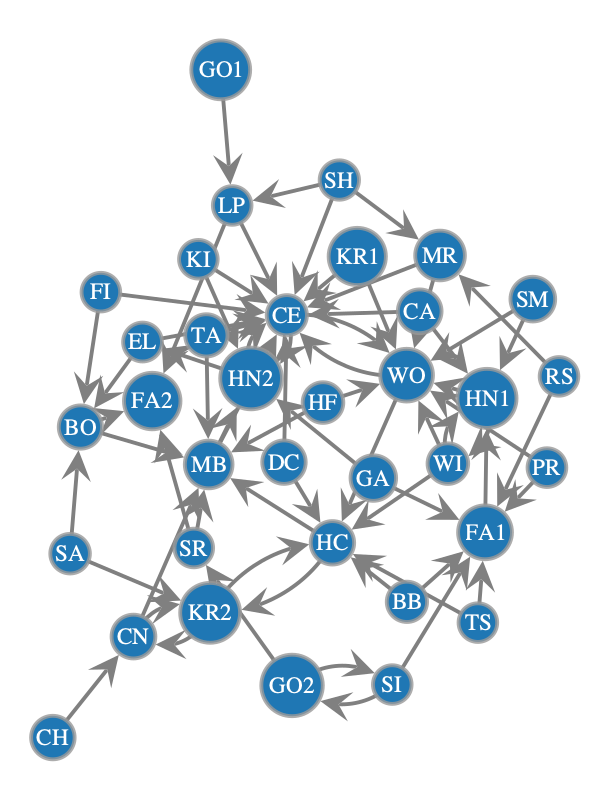

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c53aa0, at 0x173c538f0>

In [34]:
graph_draw(filtered_layers_gv, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=v_cols2['v_color'], 
           edge_color=e_cols2['e_color'],
           vertex_text=filtered_layers_gv.vp['name_decoded'])

### Option 2) assigning property maps before filtering

In [35]:
onion2.core.graph.vp['v_color'] = v_cols['v_color']
onion2.core.graph.ep['e_color'] = e_cols['e_color']

In [36]:
filtered_layers_gv2 = onion2.searcher.view_layers(layer_names=['grade_1'])
filtered_layers_gv2

<GraphView object, directed, with 35 vertices and 67 edges, 9 internal vertex properties, 6 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x173c981d0, at 0x173c99bb0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x173c981d0, at 0x173c99430>, False), at 0x173c981d0>

In [37]:
print(list(filtered_layers_gv2.vp))
print(list(filtered_layers_gv2.ep))

['layer_hash', 'node_id_hash', 'node_id', 'name', '_pos', 'layer', 'layer_decoded', 'name_decoded', 'v_color']
['source_id', 'target_id', 'source_layer', 'target_layer', 'interlayer', 'e_color']


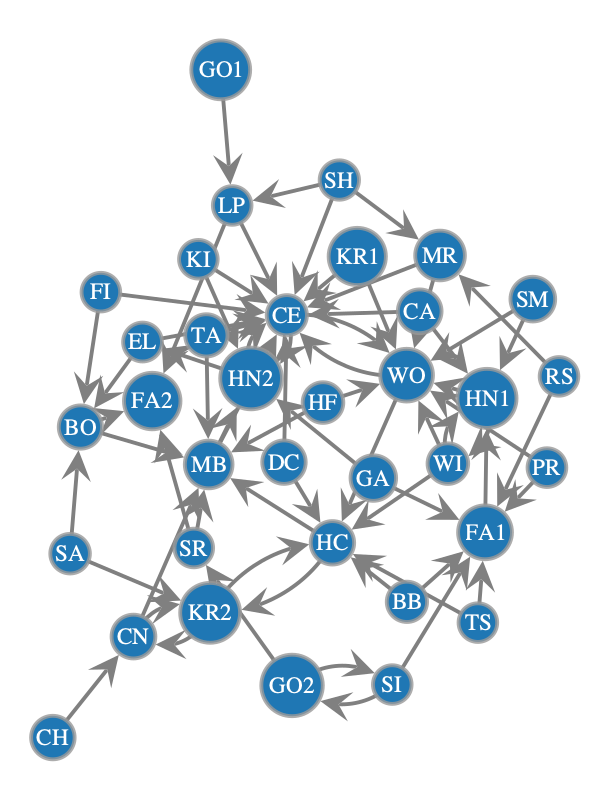

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c981d0, at 0x173c99d30>

In [38]:
graph_draw(filtered_layers_gv2, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=filtered_layers_gv2.vp['v_color'], 
           edge_color=filtered_layers_gv2.ep['e_color'],
           vertex_text=filtered_layers_gv2.vp['name_decoded'])

## Searching and filtering the network by nodes

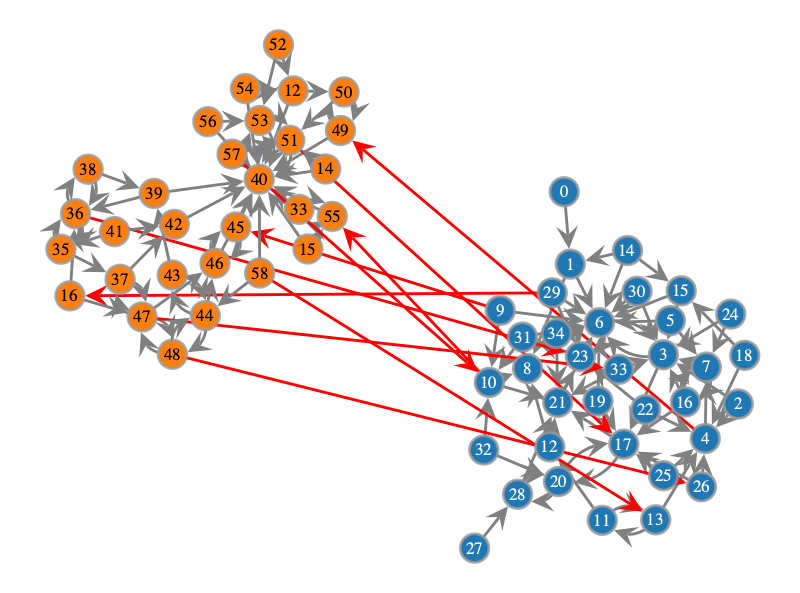

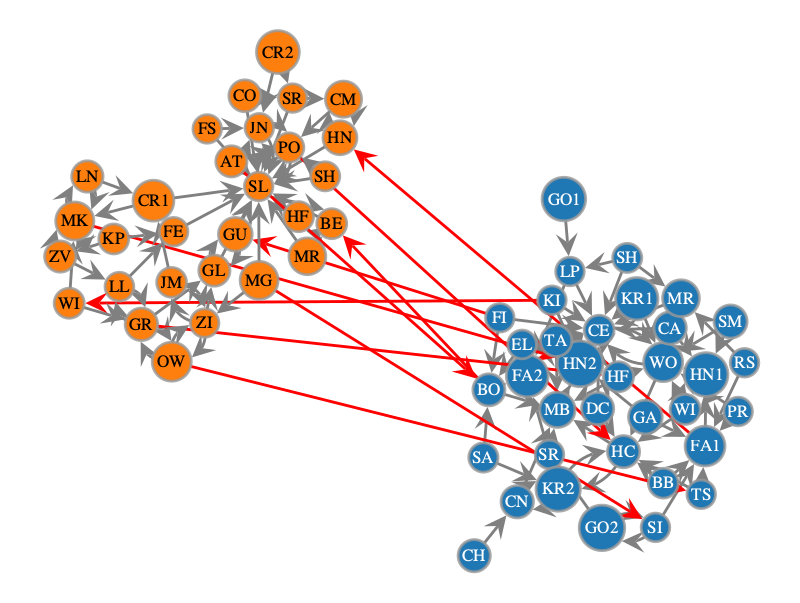

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c51a00, at 0x173c03440>

In [39]:
graph_draw(onion2.core.graph, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=v_cols['v_color'], 
           edge_color=e_cols['e_color'],
           vertex_text=onion2.core.graph.vp['name'])

graph_draw(onion2.core.graph, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=v_cols['v_color'], 
           edge_color=e_cols['e_color'],
           vertex_text=onion2.core.graph.vp['name_decoded'])

Now we can run a search

Filtered graph contains 11 vertices and 18 edges.


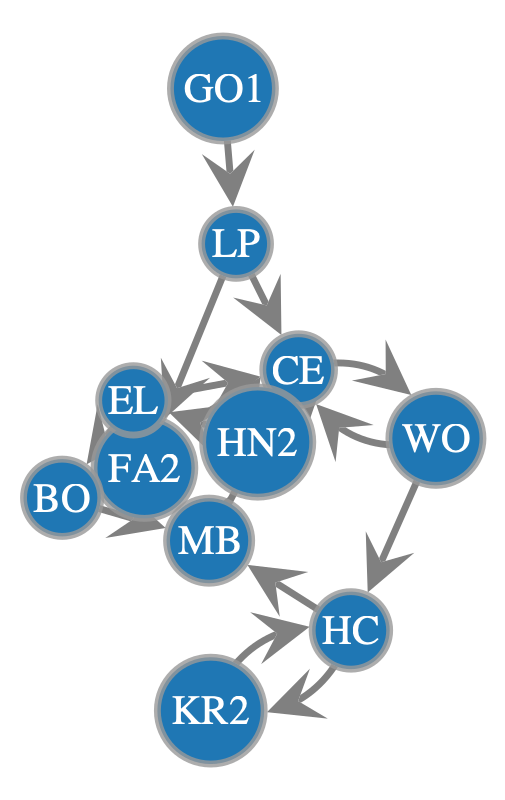

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c51be0, at 0x173c52570>

In [40]:
node_search_res = onion2.searcher.search(show_plot=False)

graph_draw(node_search_res, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=node_search_res.vp['v_color'], 
           edge_color=node_search_res.ep['e_color'],
           vertex_text=node_search_res.vp['name_decoded'])

By default, you will see that search used the 0 index starting node if we don't provide it with any more information. Furthermore, by default it only traverses downstream of the network up to 5 steps. We could try extending this.

Filtered graph contains 15 vertices and 26 edges.


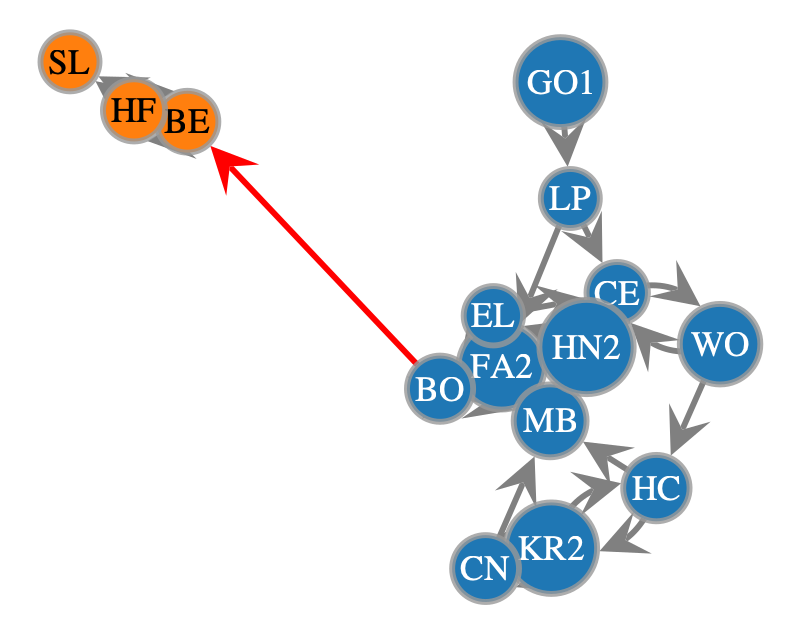

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c2d5e0, at 0x173c2e8a0>

In [43]:
node_search_res = onion2.searcher.search(show_plot=False,
                                         max_dist=7)

graph_draw(node_search_res, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=node_search_res.vp['v_color'], 
           edge_color=node_search_res.ep['e_color'],
           vertex_text=node_search_res.vp['name_decoded'])

What if we extend a bit more?

Filtered graph contains 17 vertices and 33 edges.


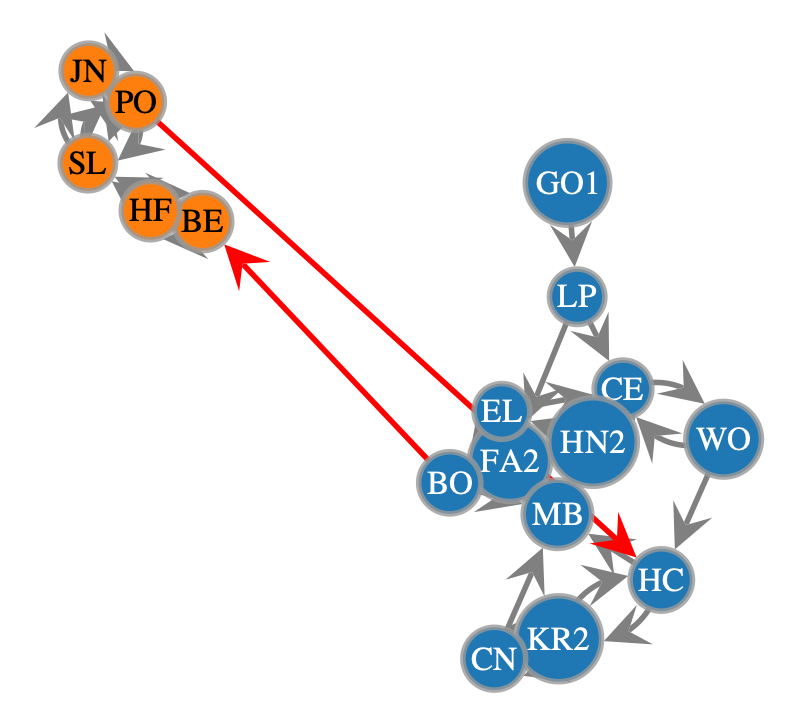

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c03cb0, at 0x1537d92b0>

In [41]:
node_search_res = onion2.searcher.search(show_plot=False,
                                         max_dist=10)

graph_draw(node_search_res, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=node_search_res.vp['v_color'], 
           edge_color=node_search_res.ep['e_color'],
           vertex_text=node_search_res.vp['name_decoded'])

We could also try starting with a different index

Filtered graph contains 3 vertices and 2 edges.


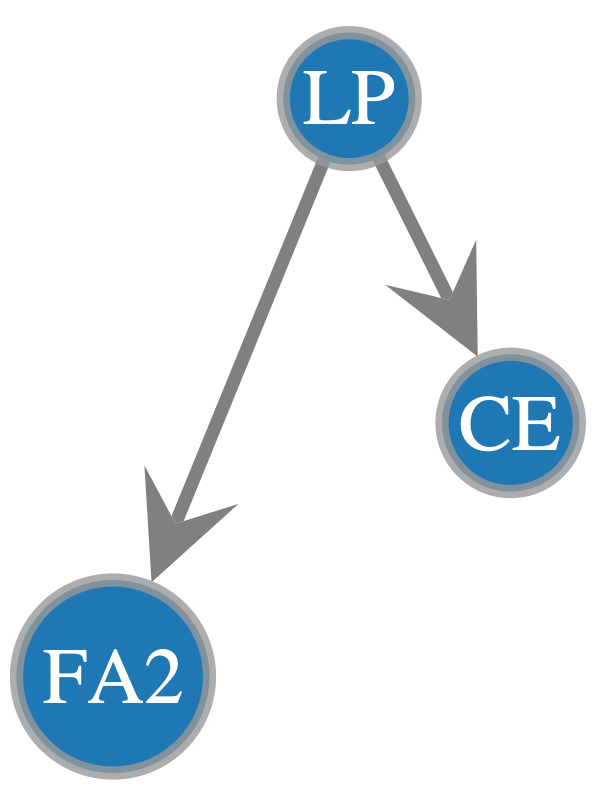

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173c52c00, at 0x173c99ee0>

In [59]:
node_search_res = onion2.searcher.search(show_plot=False,
                                         start_node_idx=1,
                                         max_dist=1)

graph_draw(node_search_res, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=node_search_res.vp['v_color'], 
           edge_color=node_search_res.ep['e_color'],
           vertex_text=node_search_res.vp['name_decoded'])

And we could also search upstream or bidirectionally

Filtered graph contains 5 vertices and 5 edges.


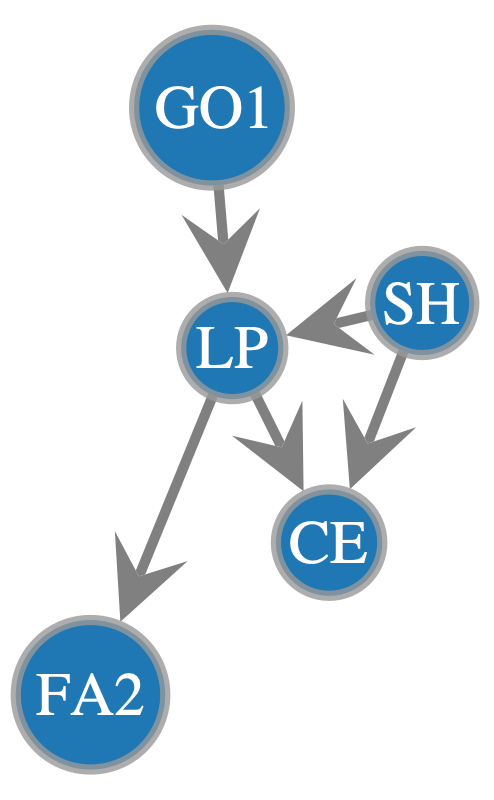

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1759e6b40, at 0x1067f0e60>

In [64]:
node_search_res = onion2.searcher.search(show_plot=False,
                                         start_node_idx=1,
                                         direction='bi',
                                         max_dist=1)

graph_draw(node_search_res, 
           pos=pos_sfdp, 
           output_size=(400, 400),
           vertex_fill_color=node_search_res.vp['v_color'], 
           edge_color=node_search_res.ep['e_color'],
           vertex_text=node_search_res.vp['name_decoded'])

In [42]:
«

SyntaxError: invalid character '«' (U+00AB) (3295285591.py, line 1)

In [ ]:
onion2.sea